# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [1]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [2]:
new_df = df[df.dt >= '1950-01-01']
new_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

c:\Users\Liza\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='year'>

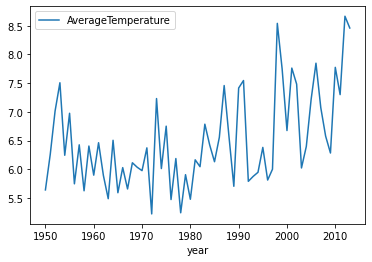

In [3]:
new_df['year'] = new_df['dt'].apply(lambda x: x.year)
new_df_Toronto = new_df[new_df.City == 'Toronto'].groupby('year', as_index=False)['AverageTemperature'].mean()
new_df_Toronto.set_index('year').plot()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [4]:
new_df.groupby('City')['AverageTemperature'].var().sort_values(ascending=False)
# ответ: Harbin

City
Harbin       218.898616
Changchun    194.600476
Shenyang     148.080952
Montreal     122.204179
Peking       120.585595
                ...    
Surabaya       0.446827
Cali           0.396163
Bogotá         0.395371
Singapore      0.385006
Jakarta        0.296116
Name: AverageTemperature, Length: 100, dtype: float64

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

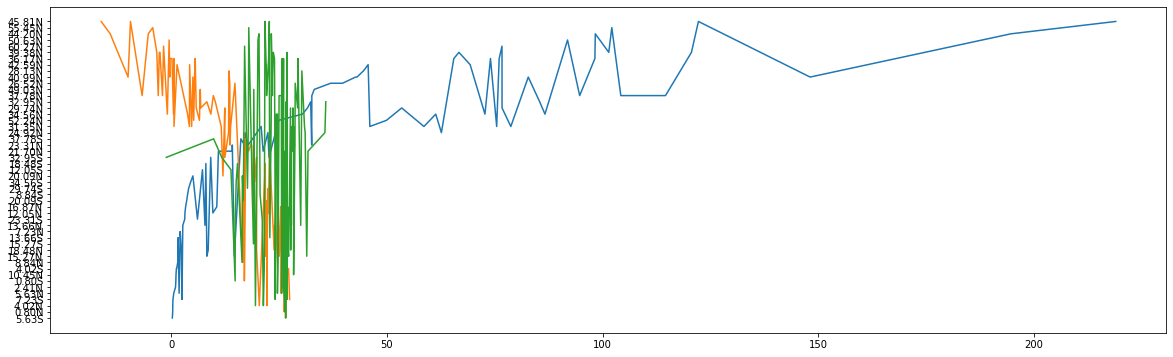

In [6]:
df_var_lat = new_df.groupby(['City', 'Latitude'], as_index=False)['AverageTemperature'].var()
df_var_lat.columns = ['City', 'Latitude', 'Var']
df_var_lat = df_var_lat.sort_values(by=['Var'])
plt.plot(df_var_lat['Var'], df_var_lat['Latitude'])

df_mean_lat = new_df[(new_df.dt >= '1975-01-01') & (new_df.dt <= '1975-01-31')]
df_mean_lat = df_mean_lat.sort_values('AverageTemperature')
plt.plot(df_mean_lat['AverageTemperature'], df_mean_lat['Latitude'])

df_mean_lat1 = new_df[(new_df.dt >= '1975-07-01') & (new_df.dt <= '1975-07-31')]
df_mean_lat1 = df_mean_lat1.sort_values('AverageTemperature')
plt.plot(df_mean_lat1['AverageTemperature'], df_mean_lat1['Latitude'])

plt.rcParams["figure.figsize"] = (20,6)

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

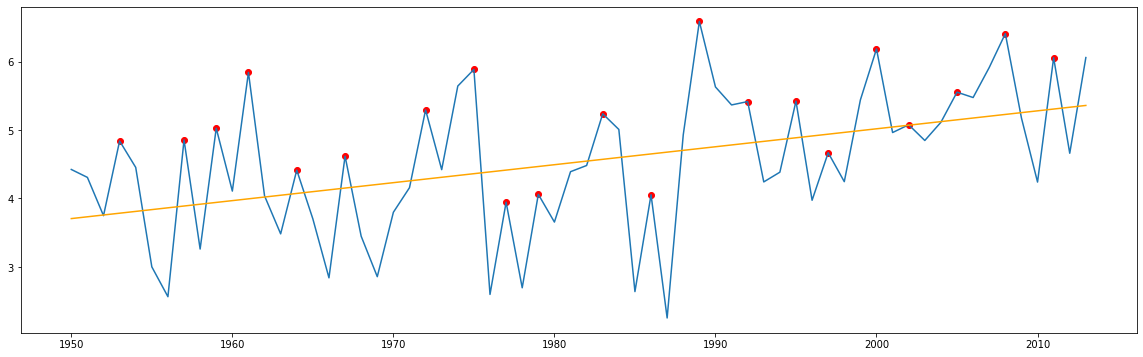

In [7]:
from sklearn.linear_model import LinearRegression

new_df_year = new_df[new_df.City == 'Saint Petersburg'].groupby('year', as_index=False)['AverageTemperature'].mean()#.sort_values(ascending=False)
list_year = []
list_temp = []
for i in range(1, len(new_df_year)-1):
    if (new_df_year['AverageTemperature'].values[i] > new_df_year['AverageTemperature'].values[i-1]) & (
        new_df_year['AverageTemperature'].values[i] > new_df_year['AverageTemperature'].values[i+1]):
        list_year.append(new_df_year['year'].values[i])
        list_temp.append(new_df_year['AverageTemperature'].values[i])

# график среднегодовой температуры
plt.plot(new_df_year['year'], new_df_year['AverageTemperature'])

# найденные года, когда средняя темп была выше, чем в предыдущем и следующем году.
plt.scatter(list_year, list_temp, c='r') 

# лин регрессия
model = LinearRegression() 
model.fit(new_df_year['year'].values.reshape(-1, 1), new_df_year['AverageTemperature'].values.reshape(-1, 1))
plt.plot(new_df_year['year'], model.predict(new_df_year['year'].values.reshape(-1, 1)), c='orange')

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество дней с отрицательной температурой в году.

In [62]:
# 1.Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
new_df['year'] = new_df['dt'].apply(lambda x: x.year)
min_max_mean = new_df.groupby(['City', 'year'], as_index=False)['AverageTemperature'].mean()
min_max_mean = min_max_mean.groupby('City', as_index=False)['AverageTemperature'].agg([min, max])
min_max_mean['diff'] = abs(min_max_mean['max'] - min_max_mean['min'])
min_max_mean.sort_values(by=['diff'], ascending=False)
# ответ: Mashhad

,min,max,diff
City,,,
Mashhad,10.688500,15.938500,5.250000
Kiev,5.231167,10.331375,5.100208
Moscow,2.454500,6.798875,4.344375
Saint Petersburg,2.254833,6.585917,4.331083
Ankara,9.061917,13.268583,4.206667
...,...,...,...
Kinshasa,23.607417,24.994417,1.387000
Dhaka,25.270917,26.648167,1.377250
Singapore,26.472750,27.775917,1.303167


In [9]:
# 2. Самая большая средняя разница между средней температурой января и средней температурой июля.
new_df['month'] = new_df['dt'].apply(lambda x: x.month)
new_df['year'] = new_df['dt'].apply(lambda x: x.year)
df_mean_1_7 = new_df[(new_df.month == 1) | (new_df.month == 7)].groupby(['City', 'year', 'month'], as_index=False)['AverageTemperature'].mean()
df_mean_1_7['diff'] = abs(df_mean_1_7.groupby(['City', 'year'], as_index=False)['AverageTemperature'].diff())
df_mean_1_7 = df_mean_1_7.dropna()
df_mean_1_7.groupby('City', as_index=False)['diff'].mean().sort_values(by=['diff'], ascending=False)
# ответ: Harbin

c:\Users\Liza\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,diff
34,Harbin,41.992719
19,Changchun,39.603719
85,Shenyang,34.927016
64,Montreal,31.169109
94,Tianjin,30.658703
...,...,...
16,Cali,0.566969
87,Surabaya,0.554109
11,Bogotá,0.542109
50,Lagos,0.486766


In [10]:
# 3. Наибольшее среднее количество месяцев!! с отрицательной температурой в году.
df_neg = new_df[new_df.AverageTemperature < 0].groupby(['City', 'year'], as_index=False)['AverageTemperature'].count()
df_neg.columns = ['City', 'year', 'temp_count']
df_neg.groupby('City', as_index=False)['temp_count'].mean().sort_values(by=['temp_count'], ascending=False)
# ответ: Harbin

,City,temp_count
6,Harbin,4.906250
2,Changchun,4.843750
14,Moscow,4.546875
13,Montreal,4.265625
20,Saint Petersburg,4.125000
28,Toronto,3.921875
23,Shenyang,3.750000
9,Kiev,3.359375
24,Taiyuan,3.234375
5,Dalian,2.750000


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) Используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и угол наклона последнего сегмента. 

In [85]:
# Отобразите города на карте, например с помощью geopandas/folium или plotly. 
# Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет.
from lat_lon_parser import parse
def parser_for_lonlat(lat_lon):
    return parse(lat_lon)
df_mean_10 = new_df[(new_df.year > 2003) &
 (new_df.month == 1)].groupby(['City', 'Latitude', 'Longitude'], as_index=False)['AverageTemperature'].mean()
df_mean_10['Latitude'] = df_mean_10['Latitude'].apply(parser_for_lonlat)
df_mean_10['Longitude'] = df_mean_10['Longitude'].apply(parser_for_lonlat)
df_mean_10.tail(10)

,City,Latitude,Longitude,AverageTemperature
90,São Paulo,-23.31,-46.31,22.7624
91,Taipei,24.92,122.36,17.0000
92,Taiyuan,37.78,111.86,-7.8200
93,Tangshan,37.78,113.90,-3.1287
94,Tianjin,39.38,116.53,-3.8920
95,Tokyo,36.17,139.23,1.8162
96,Toronto,44.20,-80.50,-6.7642
97,Umm Durman,15.27,32.50,23.3256
98,Wuhan,29.74,114.46,3.7445
99,Xian,34.56,108.97,-2.1035


In [83]:
import plotly.express as px
px.scatter_geo(df_mean_10, 
                    color='AverageTemperature', 
                    # size=[0.2]*100,
                    lat = 'Latitude',
                    lon = 'Longitude',
                    hover_name="City",
                    projection="natural earth",
                    title = 'Mean temp in Jan for last 10 years')

In [152]:
# (+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью лин рег, как в задании 3.5). 
# Отобразите города цветом, который зависит от угла наклона этой прямой. 
list_of_citys = new_df.City.unique()
list_of_years = new_df.year.unique()
koefs = []
for gorod in list_of_citys:
    y = new_df[new_df.City == gorod].groupby('year', as_index=False)['AverageTemperature'].mean()
    # лин регрессия
    model = LinearRegression() 
    model.fit(list_of_years.reshape(-1, 1), y['AverageTemperature'].values.reshape(-1, 1))
    result = model.predict(y['year'].values.reshape(-1, 1))
    koefs.append(model.coef_[0][0])
    # plt.plot(list_of_years, model.predict(y['year'].values.reshape(-1, 1)))

df_trend = new_df.groupby(['City', 'Latitude', 'Longitude'], as_index=False)['AverageTemperature'].mean()
df_trend['Latitude'] = df_trend['Latitude'].apply(parser_for_lonlat)
df_trend['Longitude'] = df_trend['Longitude'].apply(parser_for_lonlat)
px.scatter_geo(df_trend, 
                    color=koefs, 
                    lat = 'Latitude',
                    lon = 'Longitude',
                    hover_name="City",
                    projection="natural earth",
                    title = 'Trends in 1950-2013')

In [165]:
# (+1 балл) Используйте библиотеку pwlf с фиксированным числом сегментов и угол наклона последнего сегмента. 
import pwlf
import math

koefs1 = []
for gorod in list_of_citys:
    y = new_df[new_df.City == gorod].groupby('year', as_index=False)['AverageTemperature'].mean()
    model = pwlf.PiecewiseLinFit(list_of_years, y['AverageTemperature'].values)
    model.fit(6)
    # result = model.predict(list_of_years)
    koefs1.append(math.atan(model.beta[-1]))
    # plt.plot(list_of_years, result)

px.scatter_geo(df_trend, 
                    color=koefs1, 
                    lat = 'Latitude',
                    lon = 'Longitude',
                    hover_name="City",
                    projection="natural earth",
                    title = 'Trends with pwlf in 1950-2013')

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*

https://github.com/TiMeLeSsWorld00/mypython-2022/tree/main/python_project

Строка для результата: 
python .\project_name\calculations.py C:\Users\Elizaveta\PycharmProjects\python_project\project_name\GlobalLandTemperaturesByMajorCity.csv 1980